#                                      Data Science Intern at LetsGrowMore

###       Task     :      2)Stock_Market And Stacked LSTM Prediction Using Forecasting.
###        Level   :      BEGINNER LEVEL TASK
###        Batch  :      August 2k22
###        Author:      Akash Dandge

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#### Load the given dataset 

In [2]:
ds = pd.read_csv(r'S:\Projects\LGMVIP- DataScience\2.Stock_Market And Stacked LSTM Prediction Using Forecasting\NSE-TATAGLOBAL.csv')
ds.head()  #dataset

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [3]:
ds.tail()  #we having data from 21-07-2010 to 28-09-2018

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [5]:
ds.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [6]:
ds.isna().sum()  #its a time series data so make sure no null value present

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [7]:
# predicting close column
new_ds = ds.reset_index()['Close'] #Reseting the index for ['close'] column
new_ds

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

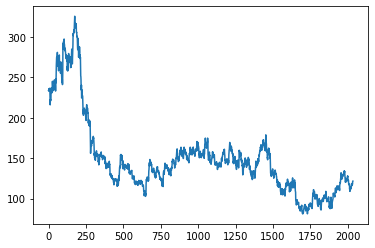

In [8]:
#visualize
plt.plot(new_ds)
plt.show()

In [9]:
new_ds

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [10]:
#LSTM are sensitive to the scale of data so we are must going to apply min-max scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1)) 
new_ds=scaler.fit_transform(np.array(new_ds).reshape(-1,1))
new_ds   #converted into array

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [11]:
##splitting dataset into train and test split
training_size=int(len(new_ds)*0.70) #70% data for train
test_size=len(new_ds)-training_size #other than 70% i.e (30%) data for test
train_data,test_data=new_ds[0:training_size,:],new_ds[training_size:len(new_ds),:1]

In [12]:
training_size,test_size

(1424, 611)

In [13]:
train_data

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.32618464],
       [0.32271242],
       [0.3247549 ]])

In [14]:
test_data

array([[0.32148693],
       [0.32352941],
       [0.3255719 ],
       [0.32638889],
       [0.33496732],
       [0.34395425],
       [0.3441585 ],
       [0.34599673],
       [0.35866013],
       [0.35580065],
       [0.37214052],
       [0.36294935],
       [0.3754085 ],
       [0.36315359],
       [0.34640523],
       [0.34579248],
       [0.34844771],
       [0.35784314],
       [0.34722222],
       [0.33353758],
       [0.33537582],
       [0.33680556],
       [0.33680556],
       [0.32271242],
       [0.32638889],
       [0.3188317 ],
       [0.33986928],
       [0.37765523],
       [0.3999183 ],
       [0.36968954],
       [0.35886438],
       [0.35927288],
       [0.35294118],
       [0.32107843],
       [0.31413399],
       [0.31740196],
       [0.31597222],
       [0.32209967],
       [0.28267974],
       [0.28492647],
       [0.27389706],
       [0.28778595],
       [0.30187908],
       [0.31045752],
       [0.32128268],
       [0.31454248],
       [0.33129085],
       [0.332

In [15]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [16]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)  #data pre-processing done

In [17]:
X_train

array([[0.62418301, 0.62214052, 0.62622549, ..., 0.83455882, 0.86213235,
        0.85273693],
       [0.62214052, 0.62622549, 0.63378268, ..., 0.86213235, 0.85273693,
        0.87111928],
       [0.62622549, 0.63378268, 0.62234477, ..., 0.85273693, 0.87111928,
        0.84497549],
       ...,
       [0.26041667, 0.2563317 , 0.24652778, ..., 0.33415033, 0.33986928,
        0.34681373],
       [0.2563317 , 0.24652778, 0.23611111, ..., 0.33986928, 0.34681373,
        0.3500817 ],
       [0.24652778, 0.23611111, 0.25204248, ..., 0.34681373, 0.3500817 ,
        0.32618464]])

In [18]:
print(X_train.shape), print(y_train.shape)

(1323, 100)
(1323,)


(None, None)

In [19]:
print(X_test.shape), print(ytest.shape)

(510, 100)
(510,)


(None, None)

In [20]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

### Create the Stacked LSTM model

In [21]:
#pip install tensorflow

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [23]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
21/21 [==============================] - 28s 472ms/step - loss: 0.0303 - val_loss: 0.0036
Epoch 2/100
21/21 [==============================] - 6s 310ms/step - loss: 0.0031 - val_loss: 0.0012
Epoch 3/100
21/21 [==============================] - 6s 310ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 4/100
21/21 [==============================] - 7s 312ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 5/100
21/21 [==============================] - 7s 312ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 6/100
21/21 [==============================] - 7s 313ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 7/100
21/21 [==============================] - 6s 312ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 8/100
21/21 [==============================] - 6s 311ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 9/100
21/21 [==============================] - 7s 312ms/step - loss: 0.0011 - val_loss: 9.2192e-04
Epoch 10/100
21/21 [==============================] - 7s 314ms/step - loss: 0.0010 - v

In [26]:
# Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

16/16 [==============================] - 1s 70ms/step


In [27]:
#Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [28]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

163.18883941777685

In [29]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

107.82910103208842

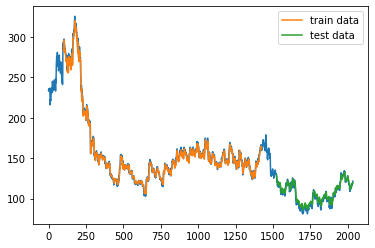

In [30]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(new_ds)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(new_ds)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(new_ds)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(new_ds))
plt.plot(trainPredictPlot,label='train data')
plt.plot(testPredictPlot,label='test data')
plt.legend()
plt.show()

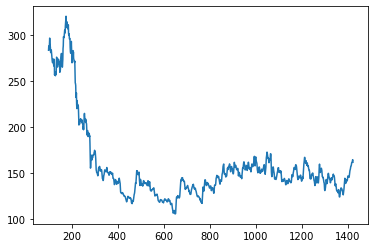

In [31]:
#plt.plot(scaler.inverse_transform(new_ds))
plt.plot(trainPredictPlot,label='train data')

#### predication for next future days

In [32]:
len(test_data)

611

In [33]:
x_input=test_data[511:].reshape(1,-1)
x_input.shape

(1, 100)

In [34]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [35]:
temp_input

[0.12479575163398693,
 0.1384803921568627,
 0.14011437908496732,
 0.1388888888888889,
 0.13541666666666663,
 0.14011437908496732,
 0.13807189542483655,
 0.130718954248366,
 0.130718954248366,
 0.12867647058823528,
 0.11846405228758167,
 0.14644607843137253,
 0.1480800653594771,
 0.159109477124183,
 0.15992647058823523,
 0.1578839869281045,
 0.16441993464052285,
 0.178921568627451,
 0.17933006535947704,
 0.19260620915032678,
 0.2081290849673203,
 0.18974673202614378,
 0.18055555555555558,
 0.1823937908496731,
 0.17708333333333326,
 0.17810457516339862,
 0.18055555555555558,
 0.17810457516339862,
 0.17851307189542487,
 0.196078431372549,
 0.18913398692810457,
 0.1895424836601307,
 0.19403594771241828,
 0.19444444444444442,
 0.20200163398692816,
 0.19771241830065356,
 0.19934640522875813,
 0.19873366013071891,
 0.19975490196078427,
 0.21282679738562094,
 0.21568627450980393,
 0.2044526143790849,
 0.21772875816993464,
 0.21098856209150318,
 0.21425653594771243,
 0.1975081699346406,
 0.1881

In [36]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.16539647]
101
1 day input [0.13848039 0.14011438 0.13888889 0.13541667 0.14011438 0.1380719
 0.13071895 0.13071895 0.12867647 0.11846405 0.14644608 0.14808007
 0.15910948 0.15992647 0.15788399 0.16441993 0.17892157 0.17933007
 0.19260621 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333
 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0

In [37]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [38]:
len(new_ds)

2035

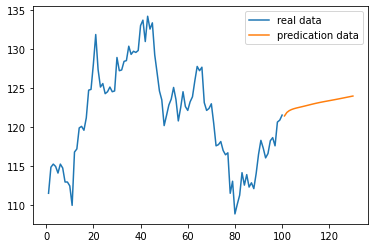

In [39]:
plt.plot(day_new,scaler.inverse_transform(new_ds[1935:]),label='real data') #100 days prediction
plt.plot(day_pred,scaler.inverse_transform(lst_output),label='predication data')
plt.legend()
plt.show()
